In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
m_d_data = pd.read_csv(mouse_drug_data_to_load)
c_t_data = pd.read_csv(clinical_trial_data_to_load)
print(m_d_data.head())
print(c_t_data.head())

# Combine the data into a single dataset
combined_data = pd.merge(m_d_data, c_t_data, how='left', on='Mouse ID')

# Display the data table for preview
combined_data.head()

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
t_v_mean = combined_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
t_v_mean = pd.DataFrame(t_v_mean)

# Preview DataFrame
t_v_mean.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
t_v_se = combined_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
t_v_se = pd.DataFrame(t_v_se)

# Preview DataFrame
t_v_se.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358

In [4]:
# Minor Data Munging to Re-Format the Data Frames
t_v_mean = t_v_mean.reset_index()
t_v_piv_mean = t_v_mean.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

t_v_se = t_v_se.reset_index()
t_v_piv_se = t_v_se.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
# t_v_piv_mean
t_v_piv_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


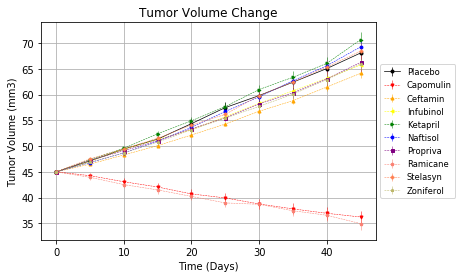

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Placebo'], yerr=t_v_piv_se['Placebo'], color='black', marker='o', linestyle='-' , linewidth=0.7, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Capomulin'], yerr=t_v_piv_se['Capomulin'], color='red', marker='v', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Ceftamin'], yerr=t_v_piv_se['Ceftamin'], color='orange', marker='^', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Infubinol'], yerr=t_v_piv_se['Infubinol'], color='yellow', marker='<', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Ketapril'], yerr=t_v_piv_se['Ketapril'], color='green', marker='>', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Naftisol'], yerr=t_v_piv_se['Naftisol'], color='blue', marker='8', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Propriva'], yerr=t_v_piv_se['Propriva'], color='purple', marker='s', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Ramicane'], yerr=t_v_piv_se['Ramicane'], color='salmon', marker='p', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Stelasyn'], yerr=t_v_piv_se['Stelasyn'], color='coral', marker='P', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(t_v_piv_mean.index, t_v_piv_mean['Zoniferol'], yerr=t_v_piv_se['Zoniferol'], color='darkkhaki', marker='*', linestyle='--' , linewidth=0.5, markersize=3)

plt.gcf().set_facecolor('white')
plt.title('Tumor Volume Change')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
lgd = plt.legend(loc=7, bbox_to_anchor=(1.25, 0.5), fontsize='small')
plt.grid(True)

# Save the Figure
plt.savefig('analysis/TumorVolumeChange', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=150)

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = combined_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
met_mean = pd.DataFrame(met_mean)

# Preview DataFrame
met_mean.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_se = combined_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
met_se = pd.DataFrame(met_se)

# Preview DataFrame
met_se.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101

In [8]:
# Minor Data Munging to Re-Format the Data Frames
met_mean = met_mean.reset_index()
met_piv_mean = met_mean.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

met_se = met_se.reset_index()
met_piv_se = met_se.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
# met_piv_mean
met_piv_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


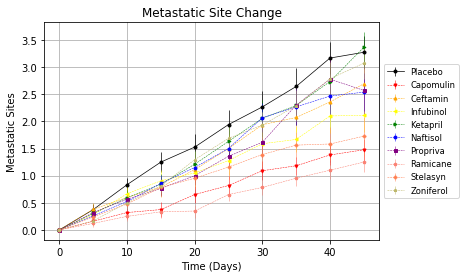

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_piv_mean.index, met_piv_mean['Placebo'], yerr=met_piv_se['Placebo'], color='black', marker='o', linestyle='-' , linewidth=0.7, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Capomulin'], yerr=met_piv_se['Capomulin'], color='red', marker='v', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Ceftamin'], yerr=met_piv_se['Ceftamin'], color='orange', marker='^', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Infubinol'], yerr=met_piv_se['Infubinol'], color='yellow', marker='<', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Ketapril'], yerr=met_piv_se['Ketapril'], color='green', marker='>', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Naftisol'], yerr=met_piv_se['Naftisol'], color='blue', marker='8', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Propriva'], yerr=met_piv_se['Propriva'], color='purple', marker='s', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Ramicane'], yerr=met_piv_se['Ramicane'], color='salmon', marker='p', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Stelasyn'], yerr=met_piv_se['Stelasyn'], color='coral', marker='P', linestyle='--' , linewidth=0.5, markersize=3)
plt.errorbar(met_piv_mean.index, met_piv_mean['Zoniferol'], yerr=met_piv_se['Zoniferol'], color='darkkhaki', marker='*', linestyle='--' , linewidth=0.5, markersize=3)

plt.gcf().set_facecolor('white')
plt.title('Metastatic Site Change')
plt.ylabel('Metastatic Sites')
plt.xlabel('Time (Days)')
lgd = plt.legend(loc=7, bbox_to_anchor=(1.25, 0.5), fontsize='small')
plt.grid(True)

# Save the Figure
plt.savefig('analysis/MetastaticSiteChange.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=150)

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
s_cnt = combined_data.groupby(['Drug', 'Timepoint']).count()['Tumor Volume (mm3)']

# Convert to DataFrame
s_cnt = pd.DataFrame({'Count': s_cnt})

# Preview DataFrame
s_cnt.head(20)

Count
Drug      Timepoint       
Capomulin 0             25
          5             25
          10            25
          15            24
          20            23
          25            22
          30            22
          35            22
          40            21
          45            21
Ceftamin  0             25
          5             21
          10            20
          15            19
          20            18
          25            18
          30            16
          35            14
          40            14
          45            13

In [11]:
# Minor Data Munging to Re-Format the Data Frames
s_cnt = s_cnt.reset_index()
s_piv_cnt = s_cnt.pivot(index='Timepoint', columns='Drug')['Count']

# Preview the Data Frame
s_piv_cnt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


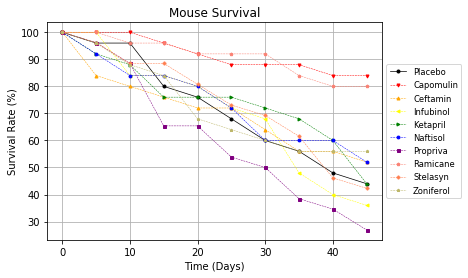

In [12]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * s_piv_cnt['Placebo'] / 25, color='black', marker='o', linestyle='-', linewidth=0.7, markersize=3)
plt.plot(100 * s_piv_cnt['Capomulin'] / 25, color='red', marker='v', linestyle='--', linewidth=0.5, markersize=3)
plt.plot(100 * s_piv_cnt['Ceftamin'] / 25, color='orange', marker='^', linestyle='--', linewidth=0.5, markersize=3)
plt.plot(100 * s_piv_cnt['Infubinol'] / 25, color='yellow', marker='<', linestyle='--', linewidth=0.5, markersize=3)
plt.plot(100 * s_piv_cnt['Ketapril'] / 25, color='green', marker='>', linestyle='--', linewidth=0.5, markersize=3)
plt.plot(100 * s_piv_cnt['Naftisol'] / 25, color='blue', marker='8', linestyle='--', linewidth=0.5, markersize=3)
plt.plot(100 * s_piv_cnt['Propriva'] / 26, color='purple', marker='s', linestyle='--', linewidth=0.5, markersize=3)
plt.plot(100 * s_piv_cnt['Ramicane'] / 25, color='salmon', marker='p', linestyle='--', linewidth=0.5, markersize=3)
plt.plot(100 * s_piv_cnt['Stelasyn'] / 26, color='coral', marker='P', linestyle='--', linewidth=0.5, markersize=3)
plt.plot(100 * s_piv_cnt['Zoniferol'] / 25, color='darkkhaki', marker='*', linestyle='--', linewidth=0.5, markersize=3)

plt.gcf().set_facecolor('white')
plt.title("Mouse Survival")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
lgd = plt.legend(loc=7, bbox_to_anchor=(1.25, 0.5), fontsize='small')
plt.grid(True)

# Save the Figure
plt.savefig('analysis/SurvivalRate.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=150)

# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
t_pct_chg_mean = 100 * (t_v_piv_mean.iloc[-1] - t_v_piv_mean.iloc[0]) / t_v_piv_mean.iloc[0]
t_pct_chg_se = 100 * (t_v_piv_se.iloc[-1] - t_v_piv_se.iloc[0]) / t_v_piv_se.iloc[0]

# t_pct_chg_mean = pd.DataFrame(t_pct_chg_mean)
# t_pct_chg_se = pd.DataFrame(t_pct_chg_se)

# Display the data to confirm
t_pct_chg_mean
# t_pct_chg_se

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

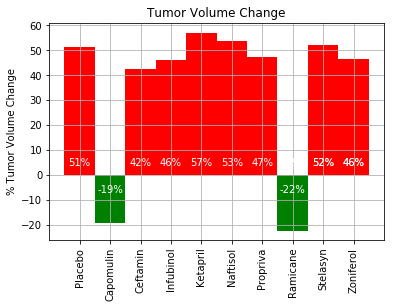

In [20]:
# Store all Relevant Percent Changes into a Tuple
pct_chg = (t_pct_chg_mean['Placebo'],
           t_pct_chg_mean['Capomulin'],
           t_pct_chg_mean['Ceftamin'],
           t_pct_chg_mean['Infubinol'],
           t_pct_chg_mean['Ketapril'],
           t_pct_chg_mean['Naftisol'],
           t_pct_chg_mean['Propriva'],
           t_pct_chg_mean['Ramicane'],
           t_pct_chg_mean['Stelasyn'],
           t_pct_chg_mean['Zoniferol'])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ticks = np.arange(len(pct_chg))
drg_fail_one = ax.bar(ticks[0], pct_chg[0], 1, color='red')
drg_pass_one = ax.bar(ticks[1], pct_chg[1], 1, color='green')
drg_fail_two = ax.bar(ticks[2:], pct_chg[2:], 1, color='red')
drg_pass_two = ax.bar(ticks[7], pct_chg[7], 1, color='green')
drg_fail_three = ax.bar(ticks[8:], pct_chg[8:], 1, color='red')

# Orient widths. Add labels, tick marks, etc. 
plt.gcf().set_facecolor('white')
ax.set_title('Tumor Volume Change')
ax.set_ylabel('% Tumor Volume Change')
ax.set_xticks(ticks)
plt.xticks(rotation='vertical')
ax.set_xticklabels(('Placebo',
                    'Capomulin',
                    'Ceftamin',
                    'Infubinol',
                    'Ketapril',
                    'Naftisol',
                    'Propriva',
                    'Ramicane',
                    'Stelasyn',
                    'Zoniferol'))
ax.grid()

# Use functions to label the percentages of changes
def pass_label(rects):
    for rect in rects:
        ht = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, -8,
                '%d%%' % int(ht),
                ha='center', va='bottom', color='white')

def fail_label(rects):
    for rect in rects:
        ht = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, 3,
                '%d%%' % int(ht),
                ha='center', va='bottom', color='white')

# Call functions to implement the function calls
pass_label(drg_pass_one)
fail_label(drg_fail_one)
pass_label(drg_pass_two)
fail_label(drg_fail_two)
fail_label(drg_fail_three)

# Save the Figure
fig.savefig('analysis/PercTumorVolumeChange.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=150)

# Show the Figure
fig.show()